# load data

In [2]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
X = df['data']
y = df['target']

**train test split**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1, 
    stratify=y
)

# pipeline

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.pipeline import make_pipeline

In [16]:
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(penalty='l2', max_iter=10000)
)

In [19]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

**Accuracy**

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = pipe_lr.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Cross validation

In [28]:
from sklearn.model_selection import StratifiedKFold

In [30]:
skf = StratifiedKFold(
    n_splits=10
)

In [35]:
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(penalty='l2', max_iter=10000)
)

In [36]:
scores = []
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    pipe_lr.fit(X_train[train_index], y_train[train_index])
    y_pred = pipe_lr.predict(X_train[test_index])
    score = accuracy_score(y_train[test_index], y_pred)
    scores.append(score)

In [39]:
import numpy as np

In [40]:
np.mean(scores), np.std(scores)

(0.8961538461538462, 0.0736120209070932)

# validation curve

**Learning curve**

In [24]:
from sklearn.model_selection import learning_curve

In [45]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=skf,
    train_sizes=np.linspace(.1, 1., 10),
    n_jobs=-1
)

In [52]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [54]:
import matplotlib.pyplot as plt

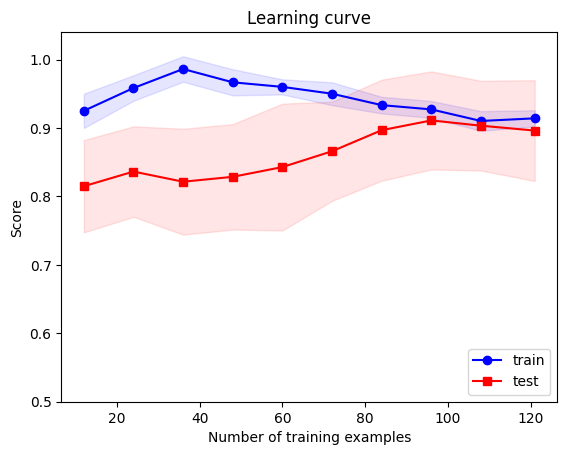

In [66]:
plt.plot(train_sizes, train_mean,
         color='blue',
        marker='o',
        ls='-',
        label='train')
plt.fill_between(train_sizes, 
                 train_mean+train_std,
                train_mean-train_std,
                 color='blue',
                 alpha=.1
                )

plt.plot(train_sizes, test_mean,
         color='red',
        marker='s',
        ls='-',
        label='test')
plt.fill_between(train_sizes, 
                 test_mean+test_std,
                test_mean-test_std,
                 color='red',
                 alpha=.1
                )

plt.title('Learning curve')
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(.5, 1.04)
plt.show()

**validation curve**

In [68]:
from sklearn.model_selection import validation_curve

In [87]:
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=skf,
    param_name='logisticregression__C',
    param_range=param_range
)

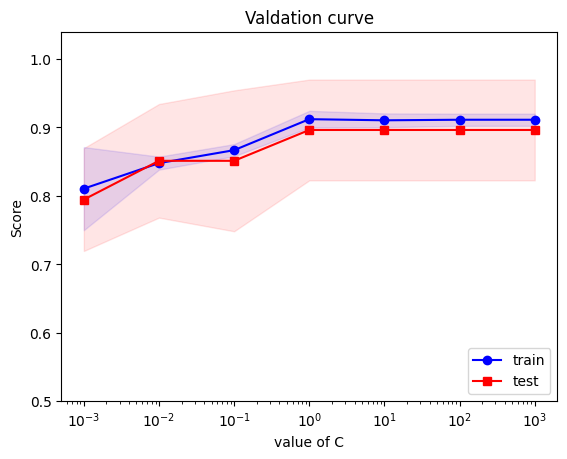

In [88]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue',
        marker='o',
        ls='-',
        label='train')
plt.fill_between(param_range, 
                 train_mean+train_std,
                train_mean-train_std,
                 color='blue',
                 alpha=.1
                )

plt.plot(param_range, test_mean,
         color='red',
        marker='s',
        ls='-',
        label='test')
plt.fill_between(param_range, 
                 test_mean+test_std,
                test_mean-test_std,
                 color='red',
                 alpha=.1
                )

plt.xscale('log')
plt.title('Valdation curve')
plt.xlabel('value of C')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(.5, 1.04)
plt.show()

# grid search

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

**Grid search**

In [93]:
pipe_svc = make_pipeline(
    StandardScaler(),
    SVC()
)

In [97]:
sfk = StratifiedKFold(n_splits=10)

In [94]:
param_range = [10**i for i in range(-3, 4)]
param_grid = [
    {
        'svc__C':param_range,
        'svc__kernel':['linear']
    },
    {
        'svc__C':param_range,
        'svc__gamma':param_range,
        'svc__kernel':['rbf']
    }
]

In [99]:
gs = GridSearchCV(
    estimator=pipe_svc,
    cv=skf,
    param_grid=param_grid,
    scoring='accuracy',
    refit=True,
    n_jobs=-1
)

In [100]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'svc__kernel': ['rbf']}],
             scoring='accuracy')

In [106]:
gs.best_params_, gs.best_score_

({'svc__C': 1, 'svc__kernel': 'linear'}, 0.9851648351648352)

In [104]:
best_model = gs.best_estimator_


In [108]:
accuracy_score(y_test, best_model.predict(X_test))

1.0

**Random search**

In [113]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [114]:
from sklearn.model_selection import RandomizedSearchCV
import scipy

In [112]:
pipe_svc = make_pipeline(
    StandardScaler(),
    SVC()
)

In [115]:
param_range = scipy.stats.loguniform(.0001, 1000.)
param_range.rvs(10)

array([5.81317779e-01, 4.22495333e-04, 3.71600139e+02, 1.28497142e+00,
       1.26015752e-03, 6.26059540e-01, 2.75041215e+01, 4.36432017e-01,
       4.16057356e-02, 6.22458145e+00])

In [116]:
param_grid = [
    {
        'svc__C':param_range,
        'svc__kernel':['linear']
    },
    {
        'svc__C':param_range,
        'svc__gamma':param_range,
        'svc__kernel':['rbf']
    }
]

In [118]:
rs = RandomizedSearchCV(
    estimator=pipe_svc,
    param_distributions=param_grid,
    cv=skf,
    scoring='accuracy',
    refit=True,
    n_jobs=-1
)

In [119]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC())]),
                   n_jobs=-1,
                   param_distributions=[{'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7799a3af72e0>,
                                         'svc__kernel': ['linear']},
                                        {'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7799a3af72e0>,
                                         'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7799a3af72e0>,
                                         'svc__kernel': ['rbf']}],
                   scoring='accuracy')

In [120]:
rs.best_score_`

0.9703296703296704

In [123]:
accuracy_score(y_test, rs.best_estimator_.predict(X_test))

1.0

**Halving search**

In [125]:
from sklearn.experimental import enable_halving_search_cv

In [127]:
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV

In [130]:
hs = HalvingRandomSearchCV(
    estimator=pipe_svc,
    param_distributions=param_grid,
    resource='n_samples',
    factor=2,
    n_jobs=-1
)

In [131]:
hs.fit(X_train, y_train)

HalvingRandomSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc', SVC())]),
                      factor=2, n_jobs=-1,
                      param_distributions=[{'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7799a3af72e0>,
                                            'svc__kernel': ['linear']},
                                           {'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7799a3af72e0>,
                                            'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7799a3af72e0>,
                                            'svc__kernel': ['rbf']}])

In [133]:
hs.best_score_

0.9666666666666666

In [134]:
hs.best_estimator_.predict(X_test)

array([0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1])

In [135]:
y_test

array([0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1])